## Задача 6.1
Рассмотрим задачу: предсказание числа заболевших некоторой болезнью от некоторых экологических анализов (см. https://github.com/andriygav/PSAD/blob/master/labs/lab1/data/sick.csv ). 
    Гарантируется, что предсказание описывается линейной моделью.

Так как проведение анализов не является бесплатным, то стоит вопрос о том, какие из анализов являются лишними для предсказания линейной модели на уровне значимости $\alpha = 0.05$.

**Требуется:**
1. Записать задачу формально.
2. Провести отбор признаков линейной модели.

Все выкладки должны быть сделаны аналитически, без использования компьютера. Допускается использование компютера для подстановки численых значений в финальную формулу.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
import scipy.stats as st

data = pd.read_csv("https://raw.githubusercontent.com/andriygav/PSAD/master/labs/lab1/data/sick.csv")
data.sample(10)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
22,-0.7,1.3,-0.1,0.8,0.4,1.8,-0.4,-0.9,-1.7,-0.2,1.0
12,-1.3,0.4,-0.2,-1.4,0.8,0.4,-0.6,-0.8,0.3,-0.2,1.0
15,1.8,-1.4,-0.6,0.5,1.4,0.9,0.7,-0.6,0.3,0.2,0.0
7,0.0,-0.8,1.1,0.1,1.0,1.3,0.7,1.0,0.2,1.5,4.0
28,-0.3,-0.8,0.9,-1.6,0.2,-0.3,-1.2,1.8,-0.4,1.0,4.0
24,0.1,1.5,-0.4,-0.4,-0.7,0.7,0.3,0.3,-0.2,0.5,1.0
21,-0.2,1.9,-0.3,-1.3,0.1,1.2,0.3,-0.9,2.3,0.2,1.0
27,-0.7,-0.8,0.1,-1.3,-0.1,-1.8,-0.4,-0.7,-0.0,1.7,2.0
25,-0.6,-0.4,-0.6,0.6,0.1,0.7,1.3,-1.6,-0.0,-0.5,1.0
2,0.3,-0.9,0.8,-0.3,-0.2,-1.4,0.4,1.6,1.0,-0.3,3.0


Нам нужно с помощью метода линейной регрессии провести отбор признаков.
Сначала посмотрим, насколько данные нормальны. Теория говорит, что критерий Стьюдента значимости признака можно применять, если имеем дело с нормальной моделью. То есть, если $(y - \hat{y})\ |\ X \sim N(0, \sigma^2)$.

In [3]:
model = sm.GLM.from_formula('Y~x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10', 
                             data=data).fit()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 1., 0., 2., 1.,
        0., 1., 2., 0., 2., 2., 4., 0., 6., 3., 0., 1., 1.]),
 array([-5.29070686, -5.03726375, -4.78382064, -4.53037753, -4.27693442,
        -4.02349131, -3.77004819, -3.51660508, -3.26316197, -3.00971886,
        -2.75627575, -2.50283264, -2.24938953, -1.99594641, -1.7425033 ,
        -1.48906019, -1.23561708, -0.98217397, -0.72873086, -0.47528775,
        -0.22184463,  0.03159848,  0.28504159,  0.5384847 ,  0.79192781,
         1.04537092,  1.29881403,  1.55225715,  1.80570026,  2.05914337,
         2.31258648]),
 <BarContainer object of 30 artists>)

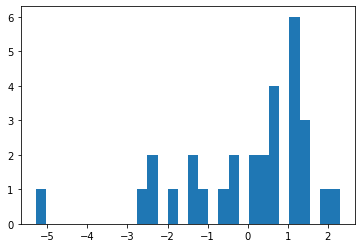

In [6]:
plt.hist(model.predict(data) - data['Y'], bins=len(data))

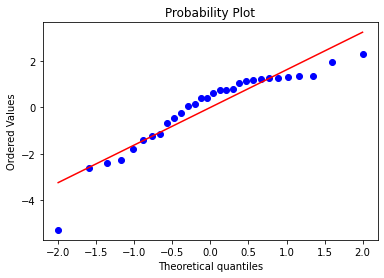

ShapiroResult(statistic=0.8887827396392822, pvalue=0.00451462110504508)


In [8]:
_ = st.probplot(model.predict(data) - data['Y'], plot=plt)
plt.show()
print(st.shapiro(model.predict(data) - data['Y']))

Как мы видим,нельзя сказать что ошибки распределены нормально. Однако других инструментов мы не знаем, поэтому воспользуемся критерием Стьюдента, а потом посмотрим, к чему привёл наш отбор признаков, улучшил ли он ситуацию.

Рассмотрим значимость каждого признака по отдельности.

**Критерий Стьюдента**

$$H_0:\ \ \beta_j = 0$$

$$H_1:\ \ \beta_j \neq 0$$

$$T = \frac{\hat{\beta_j}}{\sqrt{\frac{RSS}{n-k-1} (X^TX)^{-1}_{jj}}}$$

Нулевое распределение: $St(n-k-1)$.

p-value:

$$p = 1 - 2 F_{St(n-k-1)}(T)$$

$F_{St(n-k-1)}$ -  функция распределения для $St(n-k-1)$. 

В этой формуле мы $F_{St(n-k-1)}$ Домножаем на 2, так как отсекаем хвосты распределения Стьюдента с обеих сторон.

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       19
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                          4.2355
Method:                          IRLS   Log-Likelihood:                -57.369
Date:                Thu, 06 Apr 2023   Deviance:                       80.474
Time:                        22:27:46   Pearson chi2:                     80.5
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8479
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9411      0.491      3.954      0.000       0.979       2.903
x1            -0.8668      0.380     -2.284      0.022      -1.611      -0.123
x2             0.3373      0.456      0.739      0.460      -0.557       1.232
x3             2.9763      0.527      5.651      0.000       1.944       4.009
x4             0.4234      0.355      1.193      0.233      -0.272       1.119
x5             0.0855      0.516      0.166      0.869      -0.927       1.098
x6            -0.4043      0.430     -0.940      0.347      -1.247       0.438
x7            -0.3956      0.438     -0.903      0.367      -1.255       0.464
x8             0.1615      0.472      0.342      0.732      -0.763       1.086
x9             0.0899      0.461      0.195      0.845      -0.814       0.994
x10           -0.0148      0.550     -0.027      0.979      -1.092       1.063
==============================================================================
"""

Как видно из столбца $P>|z|$, все признаки кроме $x_1, x_3$ являются незначимыми. Можно их убрать.

In [12]:
model = sm.GLM.from_formula('Y ~ x1 + x3',
                             data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       27
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          3.5502
Method:                          IRLS   Log-Likelihood:                -59.993
Date:                Thu, 06 Apr 2023   Deviance:                       95.856
Time:                        22:29:47   Pearson chi2:                     95.9
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8647
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7281      0.367      4.711      0.000       1.009       2.447
x1            -0.7420      0.297     -2.497      0.013      -1.324      -0.160
x3             3.1980      0.433      7.392      0.000       2.350       4.046
==============================================================================
"""

Далее можем попробовать возвращать удаленные признаки по одному в модель.

In [13]:
formula = 'Y ~ x1 + x3 +'
for p in ['x2','x4','x5','x6','x7','x8', 'x9', 'x10']:
    model = sm.GLM.from_formula(formula+p, data=data).fit()

    print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       26
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          3.6282
Method:                          IRLS   Log-Likelihood:                -59.753
Date:                Thu, 06 Apr 2023   Deviance:                       94.334
Time:                        22:31:34   Pearson chi2:                     94.3
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8613
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7703      0.376      4.702      0.0

Видно, что если добавить любой из оставшихся признаков к $x_1, x_3$, то p-value покажет, что он избыточен при уровне значимости $\alpha = 0.05$. Также Log-Likelihood не увеличится.



Посмотрим теперь на линейную регрессию только с одним из значимых признаков $x_1, x_3$.

In [14]:
model = sm.GLM.from_formula('Y ~ x1',
                             data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          10.352
Method:                          IRLS   Log-Likelihood:                -76.591
Date:                Thu, 06 Apr 2023   Deviance:                       289.87
Time:                        22:33:32   Pearson chi2:                     290.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05982
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6594      0.588      4.521      0.000       1.507       3.812
x1            -0.6767      0.507     -1.334      0.182      -1.671       0.317
==============================================================================
"""

In [16]:
model = sm.GLM.from_formula('Y ~ x3',
                             data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          4.2143
Method:                          IRLS   Log-Likelihood:                -63.111
Date:                Thu, 06 Apr 2023   Deviance:                       118.00
Time:                        22:38:52   Pearson chi2:                     118.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7785
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7819      0.399      4.467      0.000       1.000       2.564
x3             3.1659      0.471      6.720      0.000       2.242       4.089
==============================================================================
"""

В обоих случаях получились сильно хуже, чем в модели $Y \sim x_1 + x_3$.


Попробуем также посмотреть на межфакторное взаимодействие между значимыми $x_1$ и $x_3$.

In [17]:
formula = 'Y ~ x1 + x3 +'
features = ['x1', 'x3']
for f1 in range(len(features)):
    for f2 in range(f1+1, len(features)): 
        f2_ = features[f2]
        f1_ = features[f1]
        model = sm.GLM.from_formula(formula+str(f1_)+':'+str(f2_),
                                    data=data).fit()               
        for name, p in model.pvalues.items():
            if p < 0.05 and ':' in name:
                print (f1_, f2_, model.bic)

x1 x3 -16.38982644984766


c:\users\artyg\appdata\local\programs\python\python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1799: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


Следовательно межфакторное взаимодействие существенно.


Итого ФИНАЛЬНАЯ МОДЕЛЬ :


In [18]:
model = sm.GLM.from_formula('Y ~ x1 * x3', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       26
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          2.7708
Method:                          IRLS   Log-Likelihood:                -55.709
Date:                Thu, 06 Apr 2023   Deviance:                       72.041
Time:                        23:31:32   Pearson chi2:                     72.0
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9423
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6900      0.324      5.211      0.000       1.054       2.326
x1            -0.4300      0.283     -1.518      0.129      -0.985       0.125
x3             3.4223      0.390      8.780      0.000       2.658       4.186
x1:x3         -0.8248      0.281     -2.932      0.003      -1.376      -0.273
==============================================================================
"""

Итого получили что из всех признаков значимыми оказались только  $x_1$ и $x_3$, причем межфакторное разложение оказывается существенным. 